In [20]:
#Importing necessary tools

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

## Loading data

In [77]:
df_tt = pd.DataFrame(pd.read_csv("titanic.csv"))
df_tt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df_tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
df_tt.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Data Visualization

In [3]:
pd.crosstab(df_tt.Age, df_tt.Survived)

Survived,0,1
Age,,
0.17,0,1
0.33,1,0
0.75,1,0
0.83,1,0
0.92,0,1
...,...,...
62.00,1,0
63.00,1,1
64.00,1,2


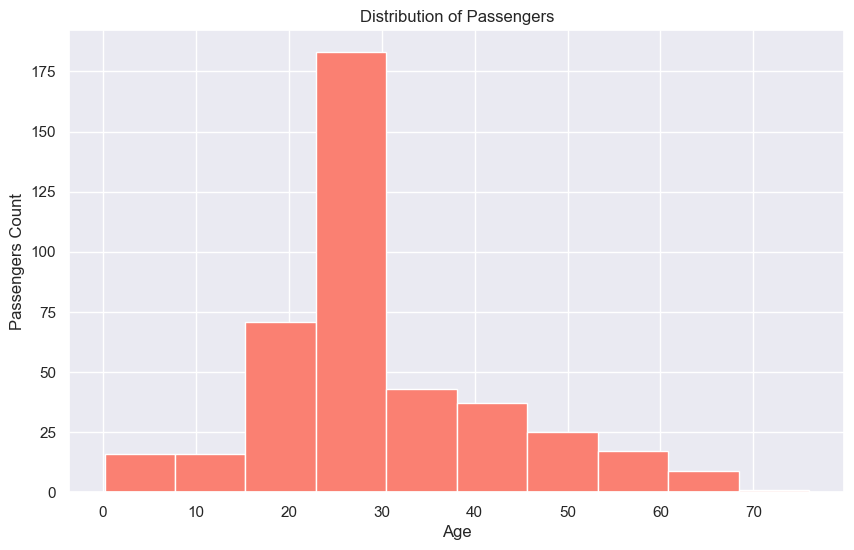

In [129]:
#Passenger strength in terms of Age
df_tt.Age.plot(kind = 'hist',
            color = 'salmon',
            figsize = (10,6))
plt.title("Distribution of Passengers")
plt.ylabel('Passengers Count')
plt.xlabel('Age');

In [127]:
#creating bins for making different age groups
grouped_age = pd.cut(df_tt['Age'], bins=5)

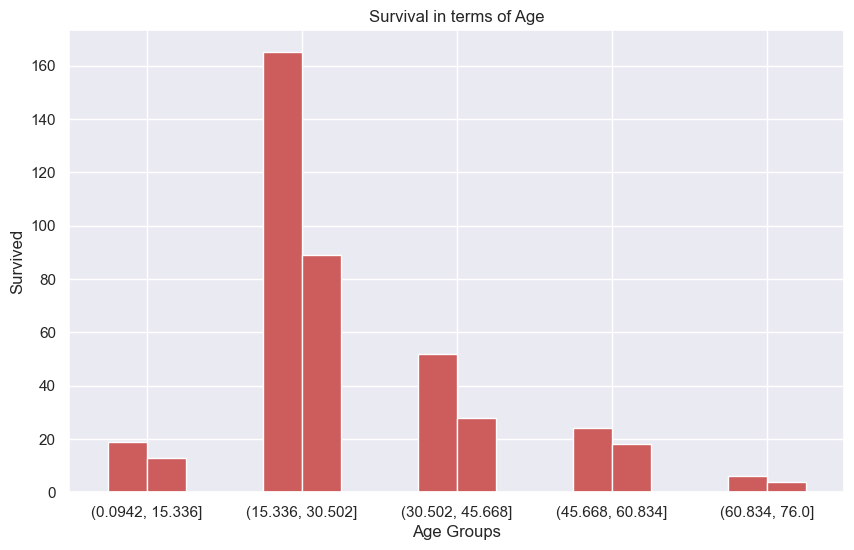

In [128]:
#visualizing
pd.crosstab(grouped_age, df_tt.Survived).plot(kind = 'bar',
                                            figsize = (10,6),
                                            color = ["indianred"],
                                            legend = False)
plt.title("Survival in terms of Age")
plt.xlabel("Age Groups")
plt.ylabel("Survived")
plt.xticks(rotation = 0);


In [131]:
sns.set(style="darkgrid")

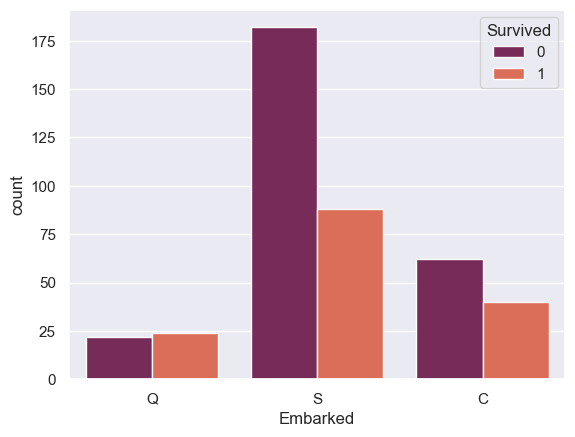

In [16]:
sns.countplot(data = df_tt,x= 'Embarked',hue='Survived', palette="rocket");

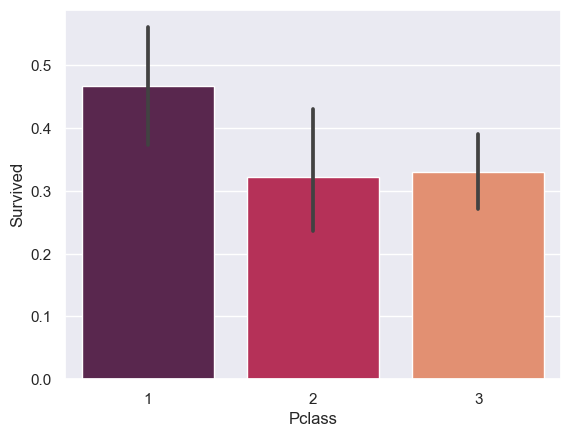

In [17]:
sns.barplot(x='Pclass', y='Survived', data=df_tt, palette="rocket");

In [21]:
#Getting the correlation matrix of features
df_tt.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.034102,0.003818,0.043080,0.008211
Survived,-0.023245,1.000000,-0.108615,-0.000013,0.099943,0.159120,0.191514
Pclass,-0.026751,-0.108615,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.000013,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.099943,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.159120,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,0.191514,-0.577147,0.337932,0.171539,0.230046,1.000000


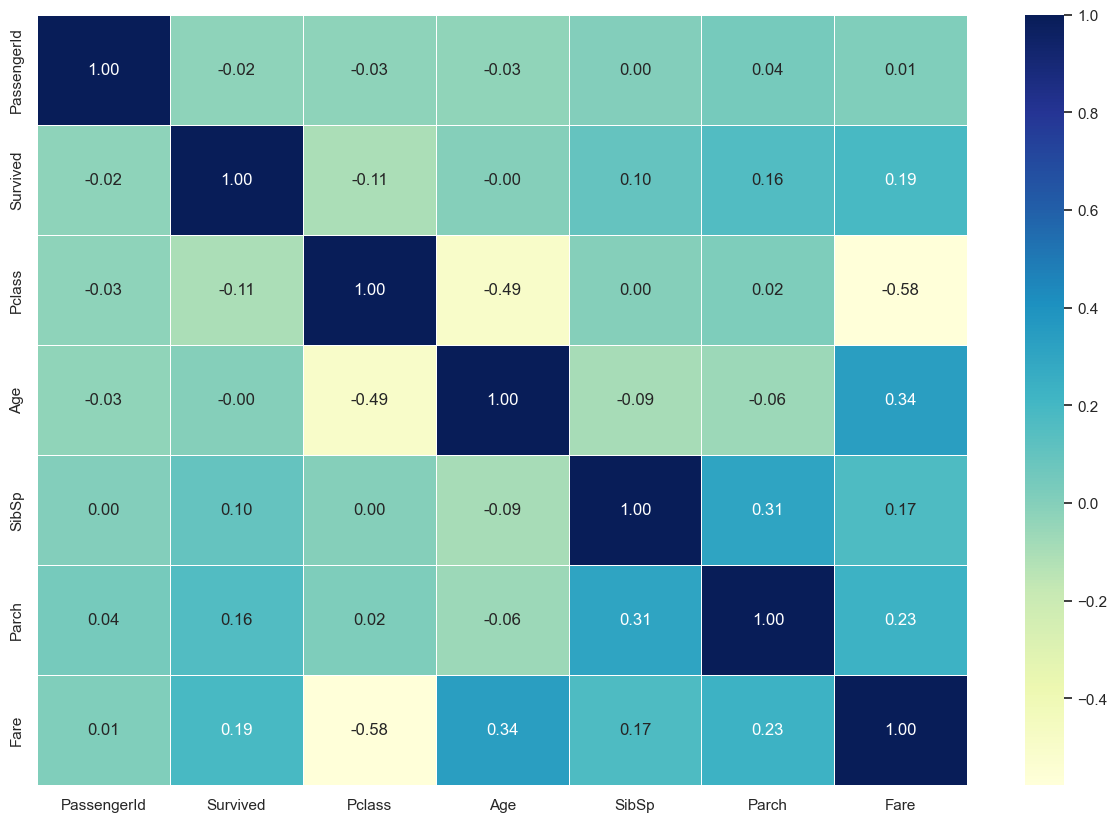

In [22]:
corr_matrix = df_tt.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidth = 0.5,
                fmt = ".2f",
                cmap = "YlGnBu")

## Preprocessing the Data

In [28]:
#checking the datatype of each column 
df_tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [78]:
#calculating the number of missing values in each column
df_tt.isna().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

#### Filling missing values

In [79]:
#Dropping the columns not required for modeling(having unique values or mostly constant)
df_tt.drop(["Name", "PassengerId", "Cabin", "Ticket"], axis = 1, inplace = True)

In [80]:
#filling the Age and Fare with mean value
df_tt["Age"].fillna(df_tt["Age"].mean(), inplace = True)
df_tt["Fare"].fillna(df_tt["Fare"].mean(), inplace = True)

In [83]:
df_tt.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [81]:
#again checking for null values
df_tt.isna().sum().sort_values(ascending = False)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

**Changing the categorical columns to numerical by using OneHotEncoder**

In [82]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Sex", "Embarked"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                  one_hot,
                                  categorical_features)],
                                  remainder = "passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

array([[ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  7.8292],
       [ 1.    ,  0.    ,  0.    , ...,  1.    ,  0.    ,  7.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  9.6875],
       ...,
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  7.25  ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  1.    ,  1.    , ...,  1.    ,  1.    , 22.3583]])

In [92]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,1.0,0.0,3.0,34.50000,0.0,0.0,7.8292
1,1.0,0.0,0.0,0.0,1.0,3.0,47.00000,1.0,0.0,7.0000
2,0.0,1.0,0.0,1.0,0.0,2.0,62.00000,0.0,0.0,9.6875
3,0.0,1.0,0.0,0.0,1.0,3.0,27.00000,0.0,0.0,8.6625
4,1.0,0.0,0.0,0.0,1.0,3.0,22.00000,1.0,1.0,12.2875
...,...,...,...,...,...,...,...,...,...,...
413,0.0,1.0,0.0,0.0,1.0,3.0,30.27259,0.0,0.0,8.0500
414,1.0,0.0,1.0,0.0,0.0,1.0,39.00000,0.0,0.0,108.9000
415,0.0,1.0,0.0,0.0,1.0,3.0,38.50000,0.0,0.0,7.2500
416,0.0,1.0,0.0,0.0,1.0,3.0,30.27259,0.0,0.0,8.0500


## Modeling

**Applying different classification models to find the best**

In [115]:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

#### Using 4 types of models on the test set
1. Logistic Regression
2. K Nearest Neighbors
3. Random Forest Classifier
4. Decision Tree Classifier

In [116]:
x = df_tt.drop("Survived", axis = 1)
y = df_tt["Survived"]

np.random.seed(42)

#Splitting data into training and testing (Ratio- 80-20)
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size = 0.2)

In [187]:
#Making models dictionary
models = {"Logistic Regression": LogisticRegression(max_iter=1000),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Support Vector Machines": SVC(),
          "Decision Tree Classifier": DecisionTreeClassifier()}
    
np.random.seed(42)

#function to fit, train and display
def fit_and_score(models, x_train, x_test, y_train, y_test):
    
    for name,model in models.items():
        
        model.fit(x_train, y_train)
        y_preds = model.predict(x_test)
        print(f"For '\033[1m {name} \033[0m' Score:", model.score(x_test, y_test))
#         print('\n')
        print("\033[1m Classification Report: \033[0m\n", classification_report(y_test, y_preds))
        print('-' * 60)
        print('\n')



In [188]:
model_scores = fit_and_score(models = models, x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test)
model_scores

For ' Logistic Regression ' Score: 1.0
 Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

------------------------------------------------------------


For ' KNN ' Score: 0.6428571428571429
 Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.84      0.74        50
           1       0.60      0.35      0.44        34

    accuracy                           0.64        84
   macro avg       0.63      0.60      0.59        84
weighted avg       0.63      0.64      0.62        84

------------------------------------------------------------


For ' Random Forest ' Score: 1.0
 Classification Report: 
               precision    recal

## Comparing our Models

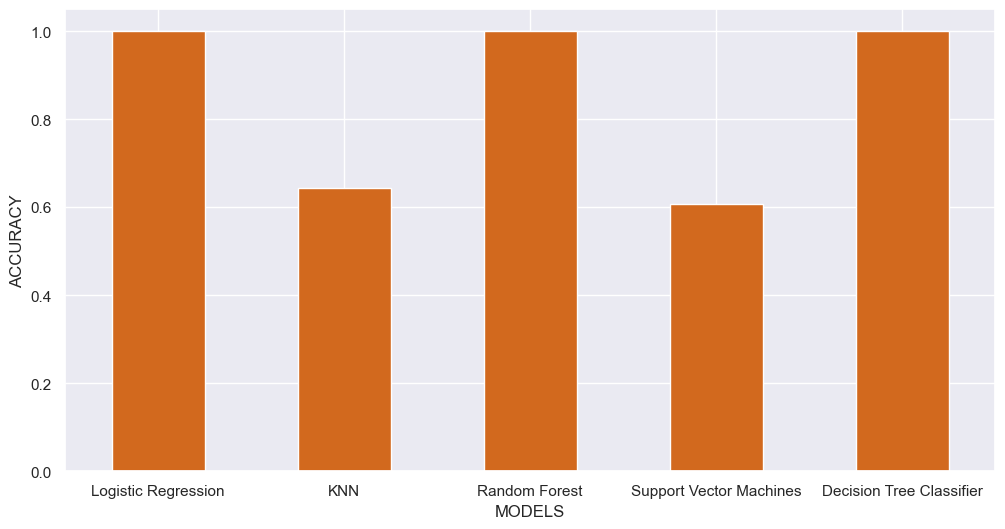

In [138]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot(kind = 'bar', color = 'chocolate', figsize = (12,6), legend=False)
plt.xlabel("MODELS")
plt.ylabel("ACCURACY")
plt.xticks(rotation = 0);

#### Getting Feature Importance (For RandomForest Model)

In [189]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
model.score(x_test, y_test)

1.0

In [191]:
model.feature_importances_

array([4.98419971e-01, 4.38898215e-01, 2.22184722e-04, 5.84724404e-03,
       2.19113356e-03, 4.62897929e-03, 1.06959137e-02, 4.57327802e-03,
       1.20741230e-02, 2.24489578e-02])

In [197]:
feature_dict = dict(zip(df_tt.columns, list(model.feature_importances_)))
feature_dict

{'Survived': 0.49841997100897123,
 'Pclass': 0.43889821481040103,
 'Sex': 0.00022218472172479058,
 'Age': 0.005847244044853911,
 'SibSp': 0.0021911335623566075,
 'Parch': 0.00462897929360441,
 'Fare': 0.01069591366690124,
 'Embarked': 0.004573278023056903}

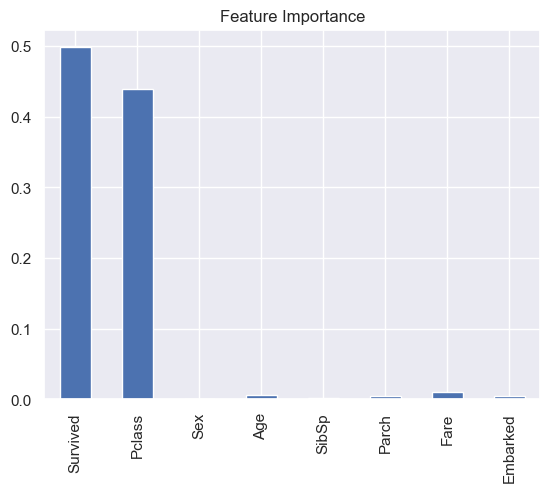

In [198]:
feature__df = pd.DataFrame(feature_dict, index=[0])
feature__df.T.plot.bar(title = "Feature Importance", legend=False);